In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('play_tennis.csv')

In [3]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
df.shape

(14, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [7]:
df['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [8]:
df['play'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df.dtypes

outlook     object
temp        object
humidity    object
wind        object
play        object
dtype: object

In [10]:
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


# Approch 1 lebal Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df_encoded =pd.DataFrame()
df_encoded

""


In [13]:
le= LabelEncoder()

In [14]:
for col in df.columns:
    df_encoded[col] = le.fit_transform(df[col])

In [15]:
df_encoded

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [16]:
X = df_encoded.iloc[:,0:4]
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [17]:
Y = df_encoded.iloc[:,-1]
Y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

# Model Creation

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf1 = LogisticRegression()

In [20]:
clf1.fit(X,Y)

LogisticRegression()

In [21]:
clf1.score(X,Y)

0.8571428571428571

In [22]:
12/14 #2 miss classification

0.8571428571428571

# Approach 2 : Using One Hot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
oe = OneHotEncoder( sparse_output = False)

In [25]:
column_list = ['outlook','temp','humidity','wind']

In [26]:
encoded =oe.fit_transform(df[column_list])

In [27]:
encoded

array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [28]:
X =pd.DataFrame(encoded, columns = oe.get_feature_names_out(column_list))     #type casting array to dataframe

In [29]:
X

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [30]:
clf= LogisticRegression()

In [31]:
clf.fit(X,Y)

LogisticRegression()

In [32]:
clf.score(X,Y)

0.8571428571428571

In [33]:
from sklearn.metrics import  confusion_matrix

In [34]:
cm = confusion_matrix(Y, clf.predict(X))

In [35]:
cm

array([[3, 2],
       [0, 9]], dtype=int64)

In [36]:
import seaborn as sns

<Axes: >

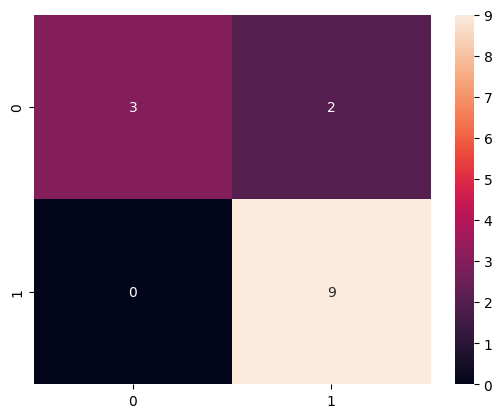

In [37]:
sns.heatmap( cm,annot = True )